In [1]:
!pip install mediapipe opencv-python


In [2]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow


In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)


In [4]:
from google.colab import files
uploaded = files.upload()


Saving IMG-20250802-WA0022.jpg to IMG-20250802-WA0022.jpg
Saving IMG-20250802-WA0023.jpg to IMG-20250802-WA0023.jpg
Saving IMG-20250802-WA0024.jpg to IMG-20250802-WA0024.jpg
Saving IMG-20250802-WA0025.jpg to IMG-20250802-WA0025.jpg
Saving IMG-20250802-WA0021.jpg to IMG-20250802-WA0021.jpg


In [5]:
image_path = list(uploaded.keys())[0]  # First uploaded image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = hands.process(img_rgb)


In [6]:
if results.multi_hand_landmarks:
    for handLms in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(img, handLms, mp_hands.HAND_CONNECTIONS)

        lm_list = []
        for id, lm in enumerate(handLms.landmark):
            h, w, c = img.shape
            lm_list.append((int(lm.x * w), int(lm.y * h)))

        # Finger tips IDs: [Thumb, Index, Middle, Ring, Pinky]
        tip_ids = [4, 8, 12, 16, 20]

        fingers = []

        # Thumb
        if lm_list[tip_ids[0]][0] > lm_list[tip_ids[0] - 1][0]:
            fingers.append(1)
        else:
            fingers.append(0)

        # Other four fingers
        for id in range(1, 5):
            if lm_list[tip_ids[id]][1] < lm_list[tip_ids[id] - 2][1]:
                fingers.append(1)
            else:
                fingers.append(0)

        total_fingers = sum(fingers)

        # Show number on image
        cv2.putText(img, f'Fingers: {total_fingers}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX,
                    2, (0, 255, 0), 3)
else:
    cv2.putText(img, "No hand detected", (10, 70), cv2.FONT_HERSHEY_SIMPLEX,
                2, (0, 0, 255), 3)


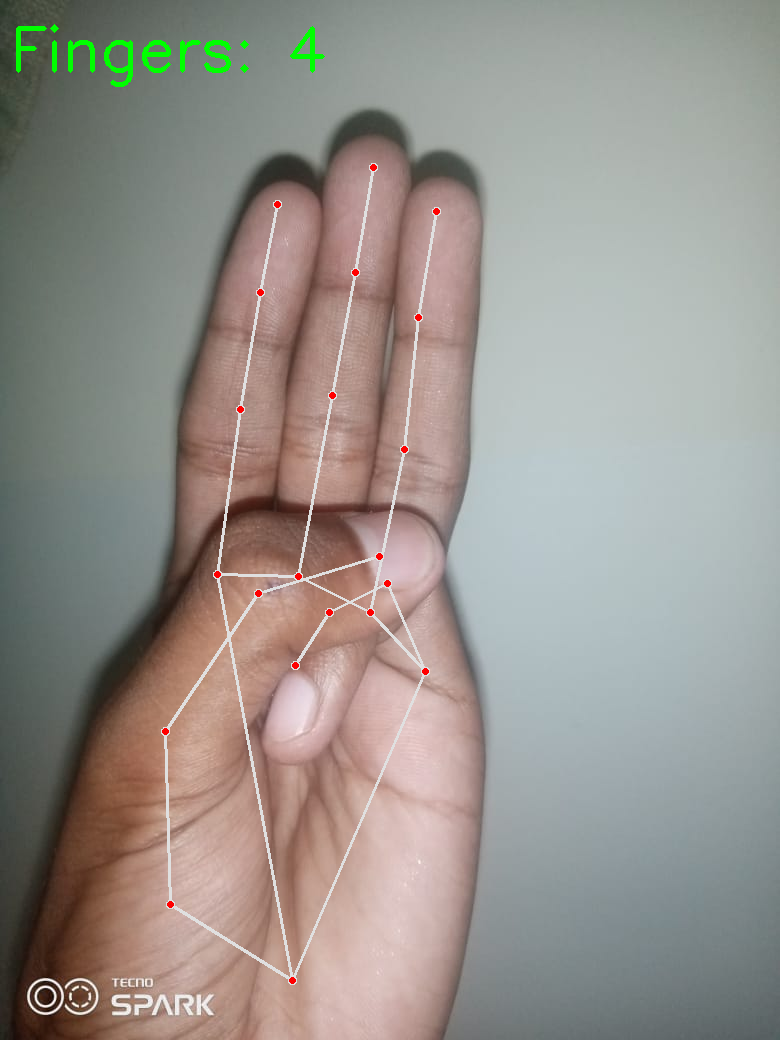

-1

In [7]:
cv2_imshow(img)
cv2.waitKey(0)


In [8]:
pip install opencv-python mediapipe


In [10]:
import cv2
import mediapipe as mp

# Initialize mediapipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)

# Open webcam
cap = cv2.VideoCapture(0)

tip_ids = [4, 8, 12, 16, 20]

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip image for natural view
    frame = cv2.flip(frame, 1)
    h, w, c = frame.shape

    # Convert color
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(img_rgb)

    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, handLms, mp_hands.HAND_CONNECTIONS)

            lm_list = []
            for id, lm in enumerate(handLms.landmark):
                lm_list.append((int(lm.x * w), int(lm.y * h)))

            fingers = []

            # Thumb
            if lm_list[tip_ids[0]][0] > lm_list[tip_ids[0] - 1][0]:
                fingers.append(1)
            else:
                fingers.append(0)

            # Other fingers
            for id in range(1, 5):
                if lm_list[tip_ids[id]][1] < lm_list[tip_ids[id] - 2][1]:
                    fingers.append(1)
                else:
                    fingers.append(0)

            total = sum(fingers)
            cv2.putText(frame, f'Fingers: {total}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX,
                        2, (0, 255, 0), 3)

    cv2.imshow("Finger Counter", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


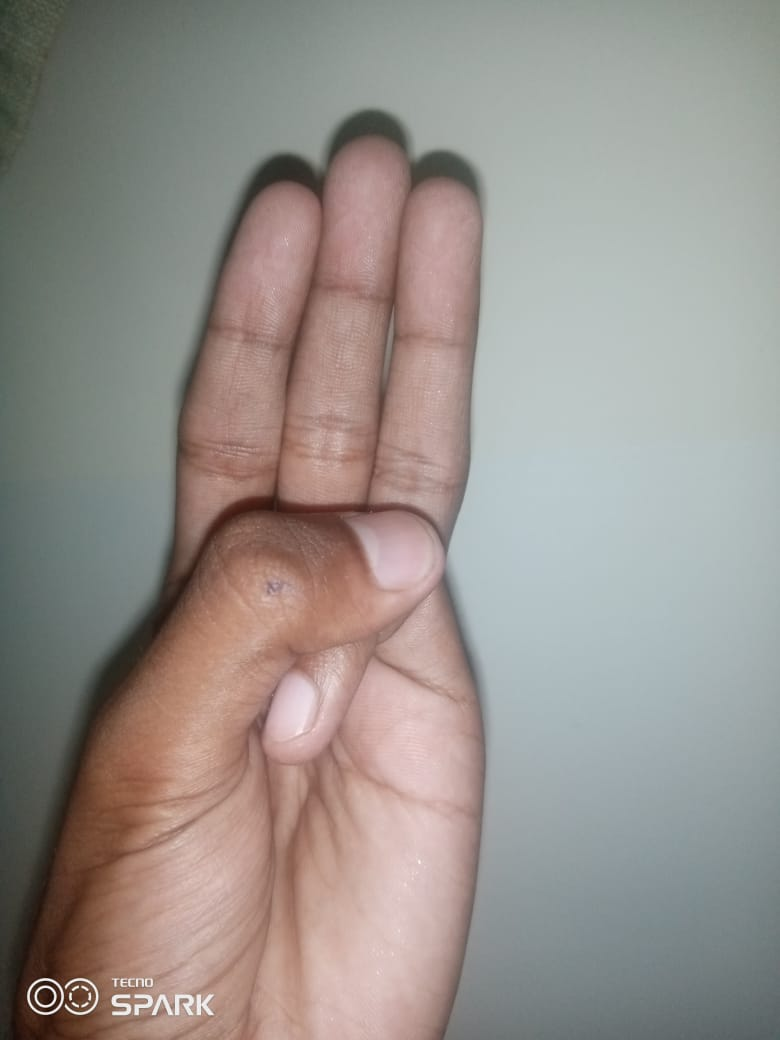

In [14]:
# Load uploaded image
for fn in uploaded.keys():
    image_path = fn
    break

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # <- This defines image_rgb
cv2_imshow(image)


Detected Fingers: 4


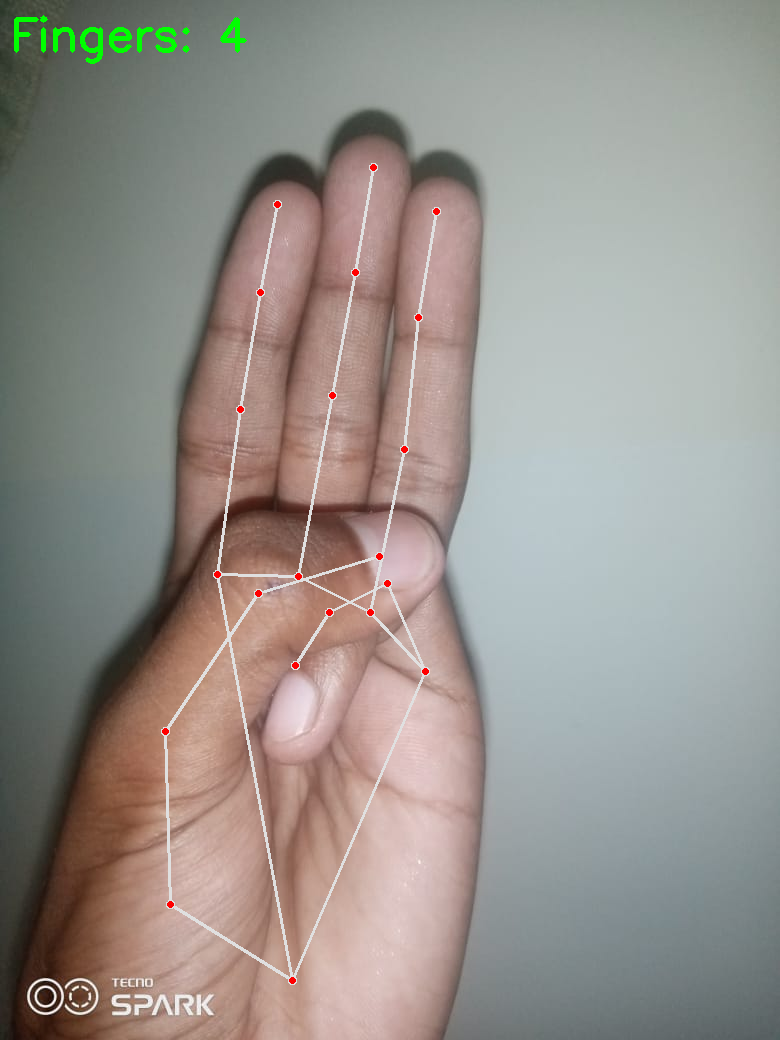

In [15]:
# Setup MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Tip landmarks of fingers (thumb to pinky)
tip_ids = [4, 8, 12, 16, 20]

with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)

    if not results.multi_hand_landmarks:
        print("No hands detected.")
    else:
        for hand_landmarks in results.multi_hand_landmarks:
            h, w, _ = image.shape
            lm_list = []

            for id, lm in enumerate(hand_landmarks.landmark):
                lm_list.append((int(lm.x * w), int(lm.y * h)))

            fingers = []

            # Thumb (based on x)
            if lm_list[tip_ids[0]][0] > lm_list[tip_ids[0] - 1][0]:
                fingers.append(1)
            else:
                fingers.append(0)

            # Other fingers (based on y)
            for id in range(1, 5):
                if lm_list[tip_ids[id]][1] < lm_list[tip_ids[id] - 2][1]:
                    fingers.append(1)
                else:
                    fingers.append(0)

            count = fingers.count(1)
            print(f"Detected Fingers: {count}")

            # Draw landmarks on image
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(annotated_image, f'Fingers: {count}', (10, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)

            cv2_imshow(annotated_image)


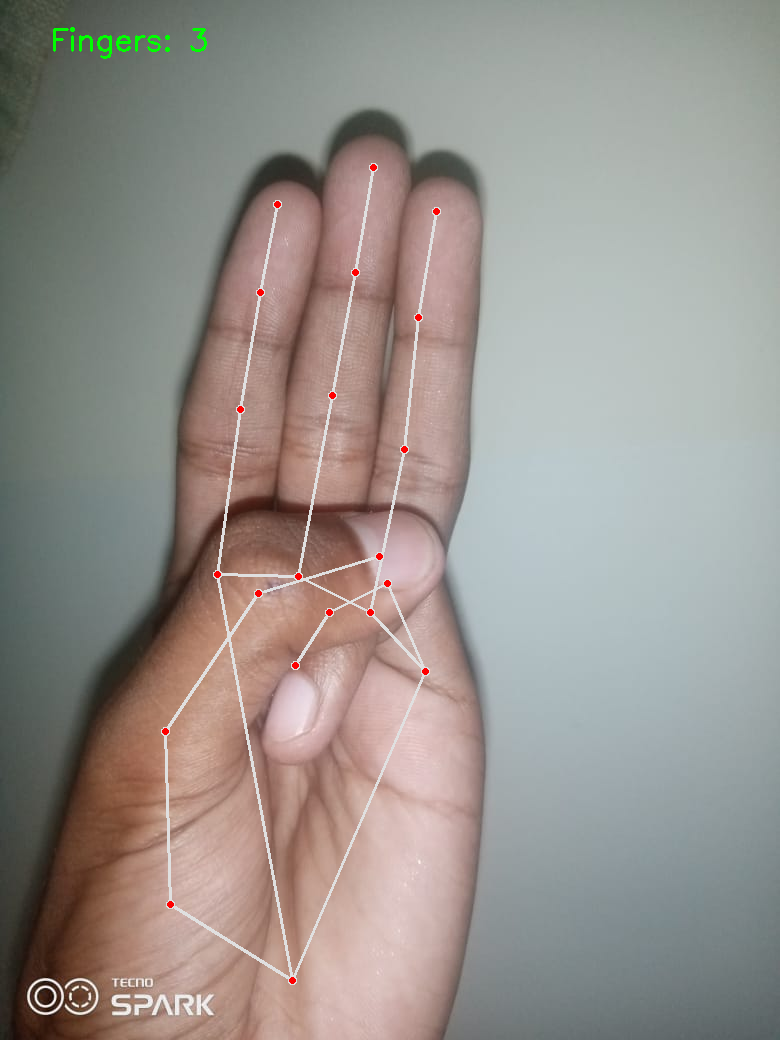

In [16]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Load image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize hand detection
with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Get landmark list
            landmarks = hand_landmarks.landmark

            fingers_up = 0

            # Thumb (use x-coordinates)
            if landmarks[4].x < landmarks[3].x:  # right hand thumb
                fingers_up += 1

            # Other fingers (tip.y < pip.y)
            finger_tips = [8, 12, 16, 20]
            finger_pips = [6, 10, 14, 18]

            for tip, pip in zip(finger_tips, finger_pips):
                if landmarks[tip].y < landmarks[pip].y:
                    fingers_up += 1

            # Show result
            cv2.putText(image, f'Fingers: {fingers_up}', (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display result
cv2_imshow(image)


In [17]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize camera
cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7) as hands:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb_frame)

        fingers_up = 0

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                landmarks = hand_landmarks.landmark

                # Thumb
                if landmarks[4].x < landmarks[3].x:
                    fingers_up += 1

                # Other fingers
                tips = [8, 12, 16, 20]
                pips = [6, 10, 14, 18]
                for tip, pip in zip(tips, pips):
                    if landmarks[tip].y < landmarks[pip].y:
                        fingers_up += 1

        # Display count
        cv2.putText(frame, f'Fingers: {fingers_up}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX,
                    2, (0, 255, 0), 3)

        cv2.imshow("Hand Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [19]:
!pip install opencv-python mediapipe


In [20]:
import cv2
import mediapipe as mp

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize camera
cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7) as hands:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb_frame)

        fingers_up = 0

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                landmarks = hand_landmarks.landmark

                # Thumb
                if landmarks[4].x < landmarks[3].x:
                    fingers_up += 1

                # Other fingers
                tips = [8, 12, 16, 20]
                pips = [6, 10, 14, 18]
                for tip, pip in zip(tips, pips):
                    if landmarks[tip].y < landmarks[pip].y:
                        fingers_up += 1

        # Display count
        cv2.putText(frame, f'Fingers: {fingers_up}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX,
                    2, (0, 255, 0), 3)

        cv2.imshow("Hand Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📷 Take Photo';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize video to fullscreen
          video.width = 640;
          video.height = 480;

          // Wait for capture button to be clicked
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [25]:
from base64 import b64decode


<IPython.core.display.Javascript object>

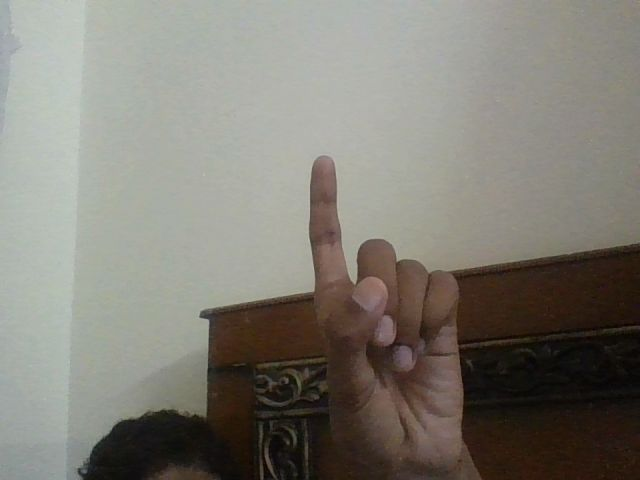

🖐 Fingers raised: 1


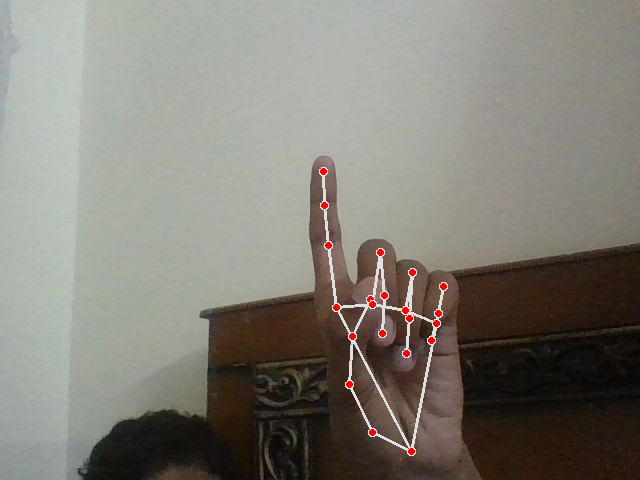

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode
import cv2

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = '📷 Take Photo';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          video.width = 640;
          video.height = 480;

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# 👇 Take photo
filename = take_photo()

# 👇 Read and show image
image = cv2.imread(filename)
cv2_imshow(image)

import mediapipe as mp
import numpy as np

# Initialize MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Convert BGR image (OpenCV) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process image using MediaPipe
with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    results = hands.process(image_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Count raised fingers
            landmarks = hand_landmarks.landmark
            finger_tips = [8, 12, 16, 20]  # Index to pinky
            count = 0

            for tip in finger_tips:
                if landmarks[tip].y < landmarks[tip - 2].y:
                    count += 1

            # Thumb check
            if landmarks[4].x < landmarks[3].x:  # For right hand; flip < to > if it’s left
                count += 1

            print(f"🖐 Fingers raised: {count}")
    else:
        print("No hand detected.")

# Show the image with landmarks
cv2_imshow(image)

